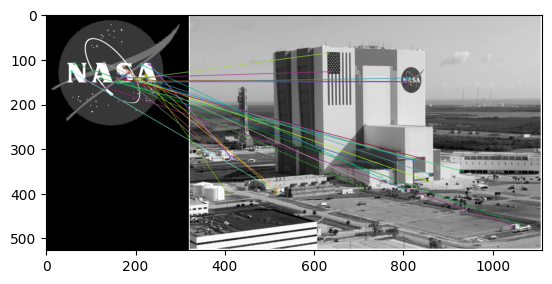

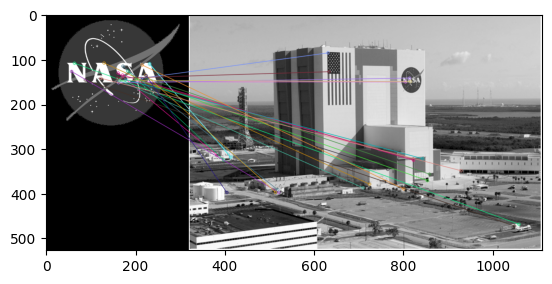

In [14]:
import cv2
from matplotlib import pyplot as plt
# Load the images.
img0 = cv2.imread('coca-cola-logo.png',
                  cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('checkerboard_color.png',
                  cv2.IMREAD_GRAYSCALE)
# Perform ORB feature detection and description.
orb = cv2.ORB_create()
kp0, des0 = orb.detectAndCompute(img0, None)
kp1, des1 = orb.detectAndCompute(img1, None)
# Perform brute-force matching.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des0, des1)
# Sort the matches by distance.
matches = sorted(matches, key=lambda x:x.distance)
# Draw the best 25 matches.
img_matches = cv2.drawMatches(img0, kp0, img1, kp1, matches[:25], img1,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# Show the matches.
plt.imshow(img_matches)
plt.show()

img_matches = cv2.drawMatches(
    img0, kp0, img1, kp1, matches[:25], img1,
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# Perform brute-force KNN matching.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
pairs_of_matches = bf.knnMatch(des0, des1, k=2)
pairs_of_matches = sorted(pairs_of_matches, key=lambda x:x[0].distance)
# Show the matches.
plt.imshow(img_matches)
plt.show()

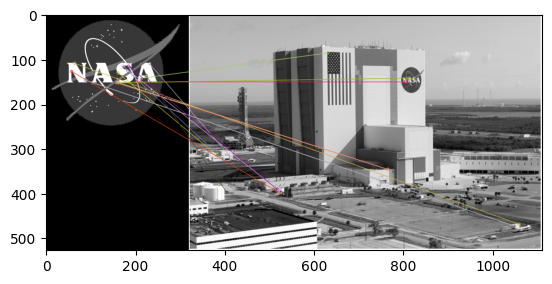

In [18]:
# Apply the ratio test.
matches = [x[0] for x in pairs_of_matches
           if len(x) > 1 and x[0].distance < 0.8 * x[1].distance]
# Draw the best 25 matches.
img_matches = cv2.drawMatches(
    img0, kp0, img1, kp1, matches[:15], img1,
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# Show the matches.
plt.imshow(img_matches)
plt.show()